___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)



#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score

from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [7]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [8]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.




In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [11]:
data.duplicated().sum().any()

False

In [12]:
data.isnull().sum().any()

False

In [13]:
data['CustomerID'].nunique()

200

In [14]:
data.drop(["CustomerID"], axis = 1, inplace=True)

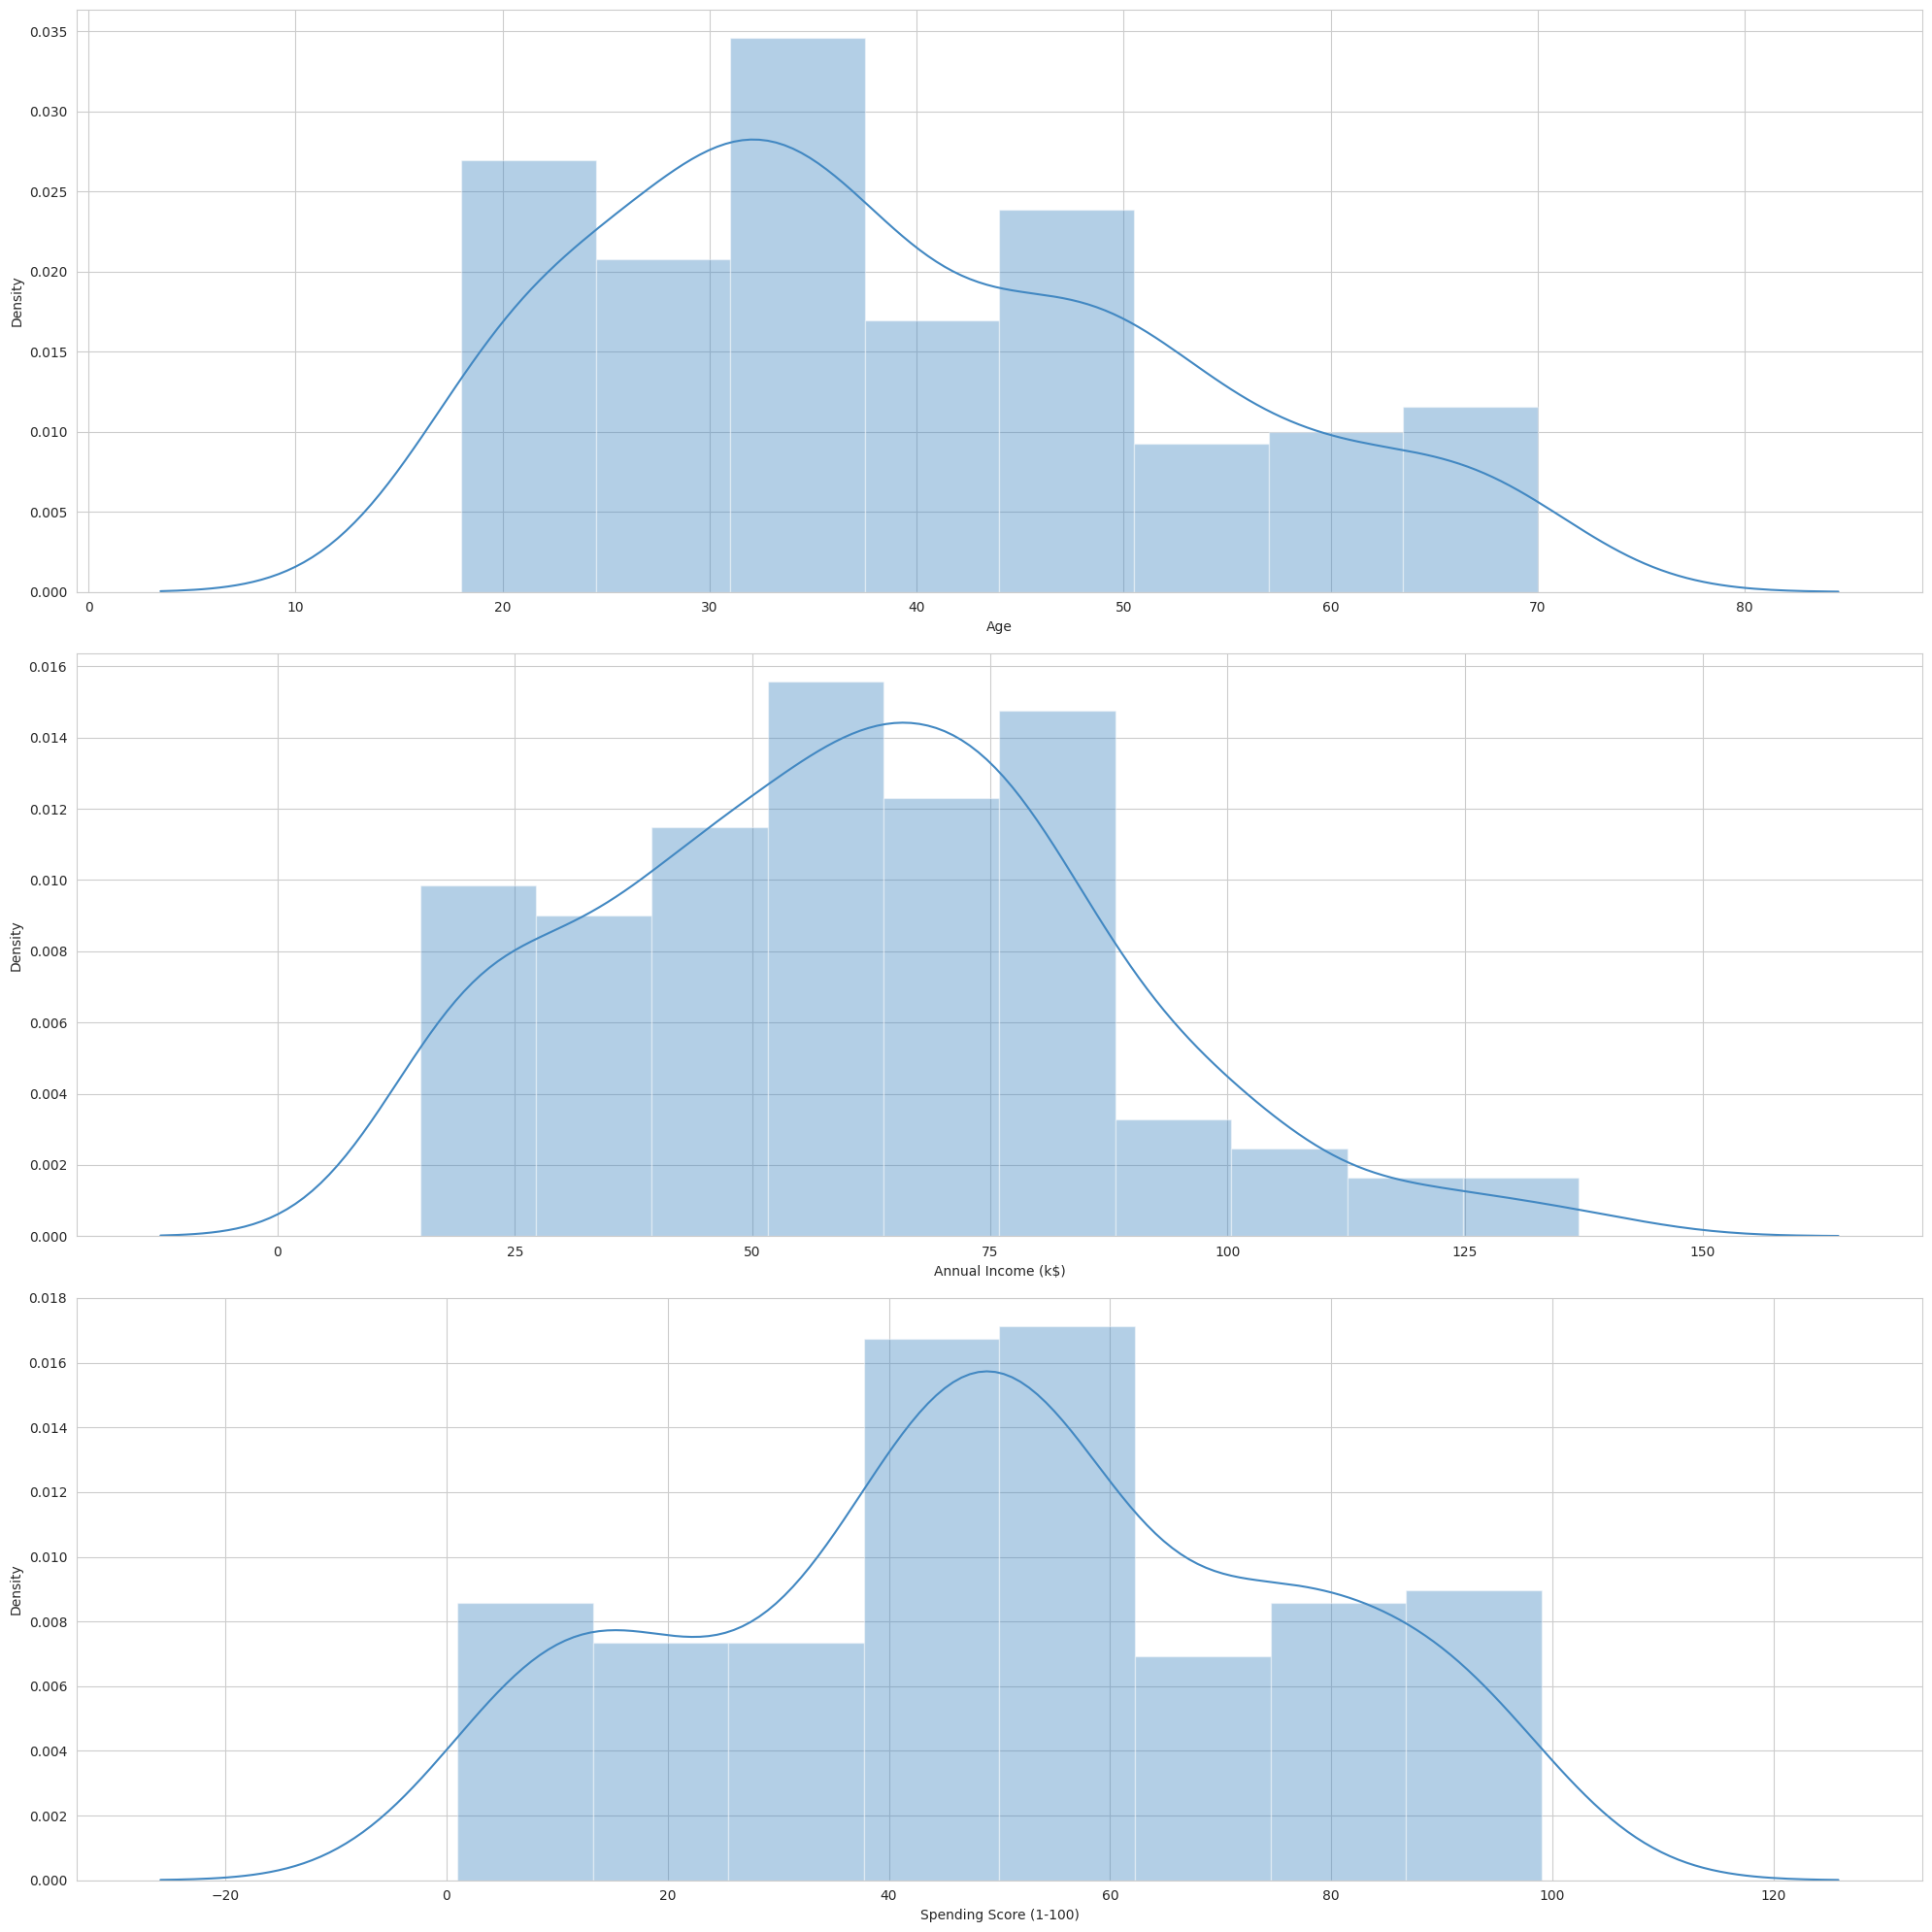

In [15]:
plt.figure(figsize = (20, 20))
column=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in range(0,3):
    plt.subplot(3, 1, i+1)
    sns.distplot(data[column[i]], color="#4288c2")    #histplot,distplot
    plt.tight_layout()

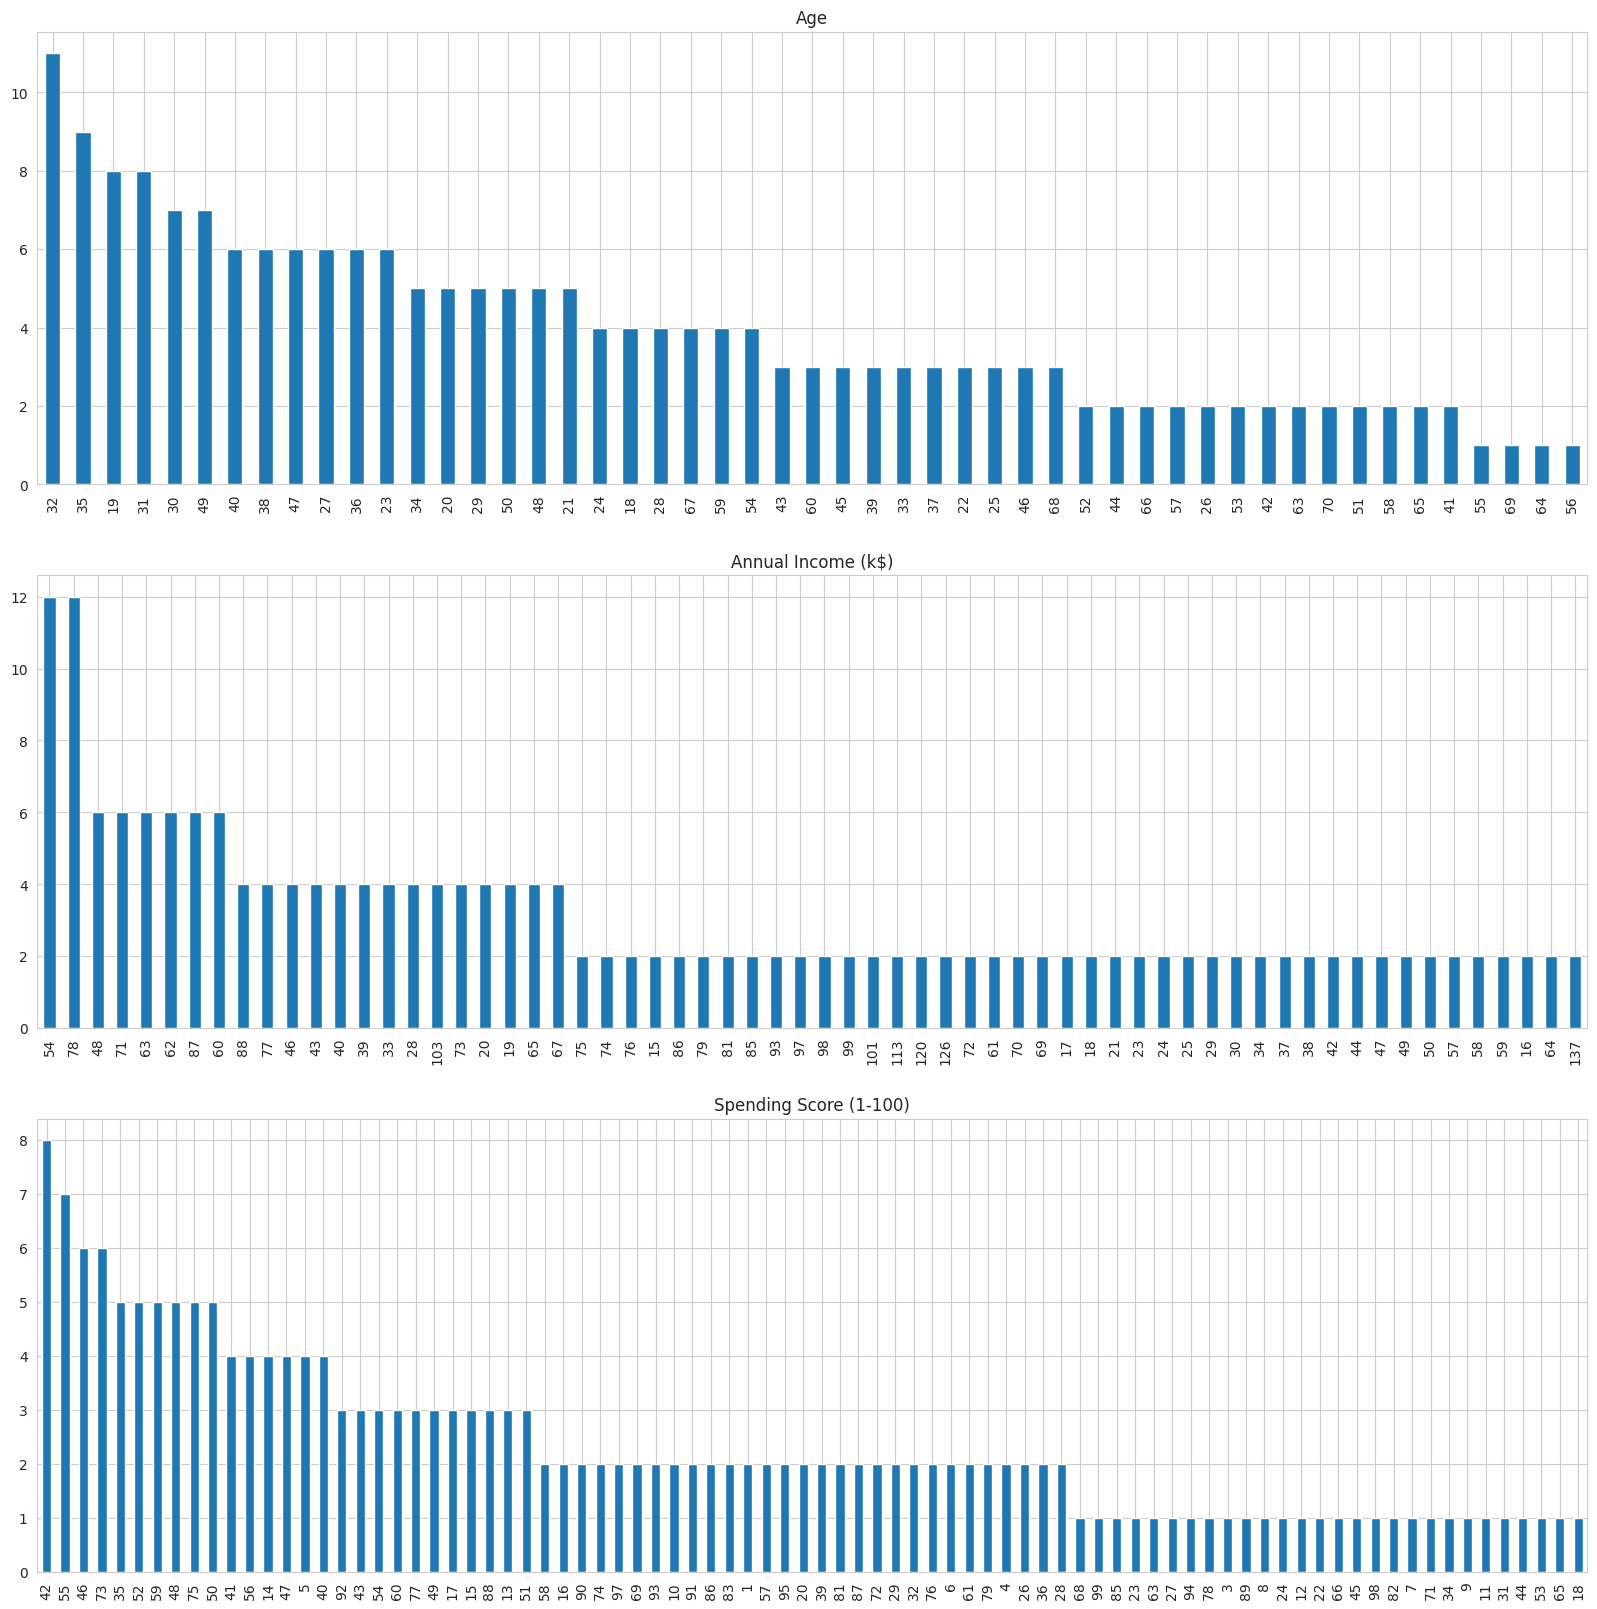

In [16]:
column=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in range(0,3):
      plt.subplot(3, 1, i+1)
      plt.title(column[i])
      data[column[i]].value_counts().plot.bar(figsize = (20, 20))

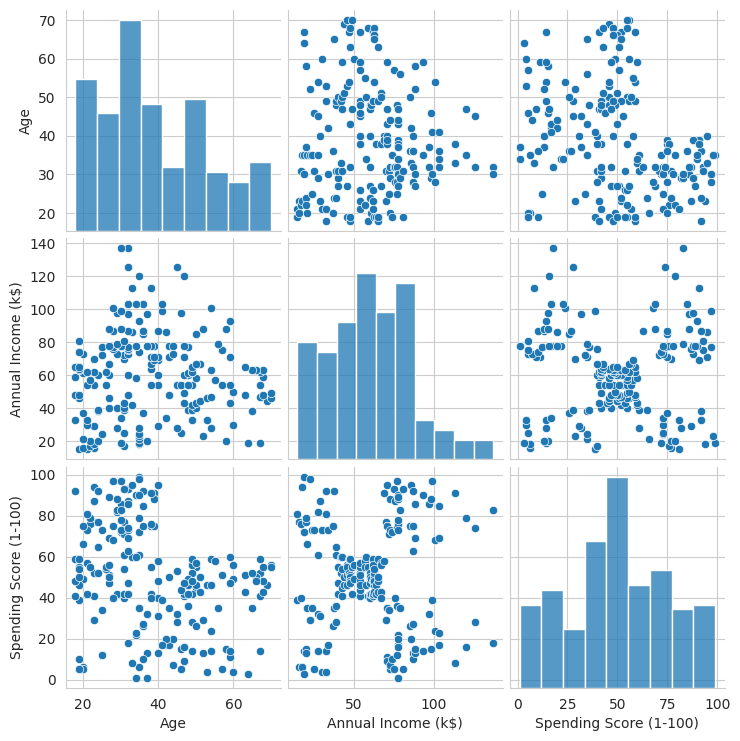

In [17]:
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
df = pd.DataFrame(data, columns=columns)
sns.pairplot(df)
plt.show()

<Axes: >

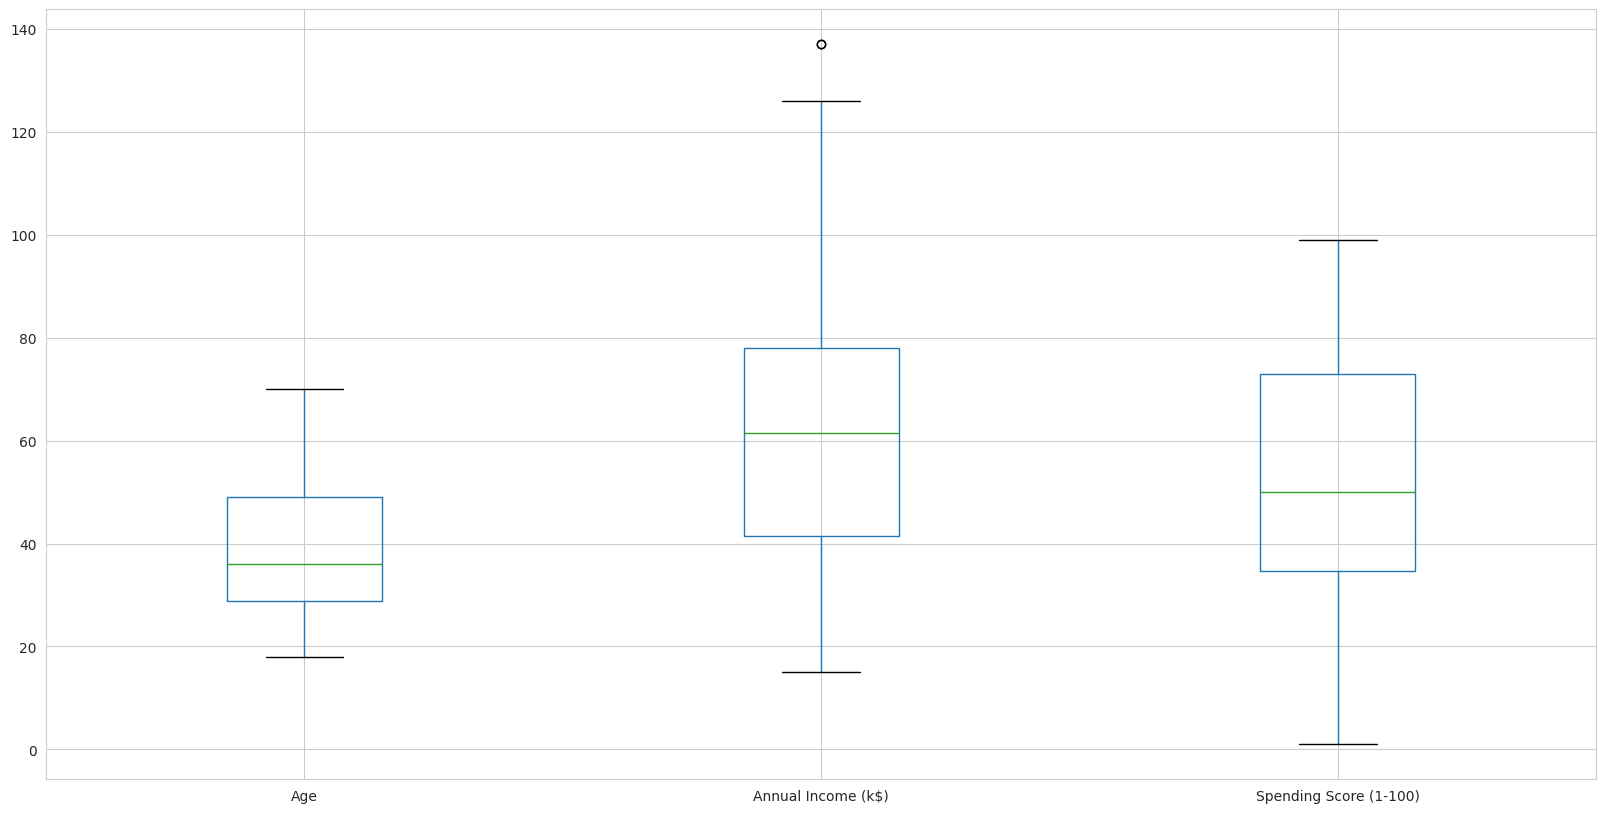

In [18]:
#check if there is outlier
plt.figure(figsize =(20,10))
df.boxplot()

<Axes: >

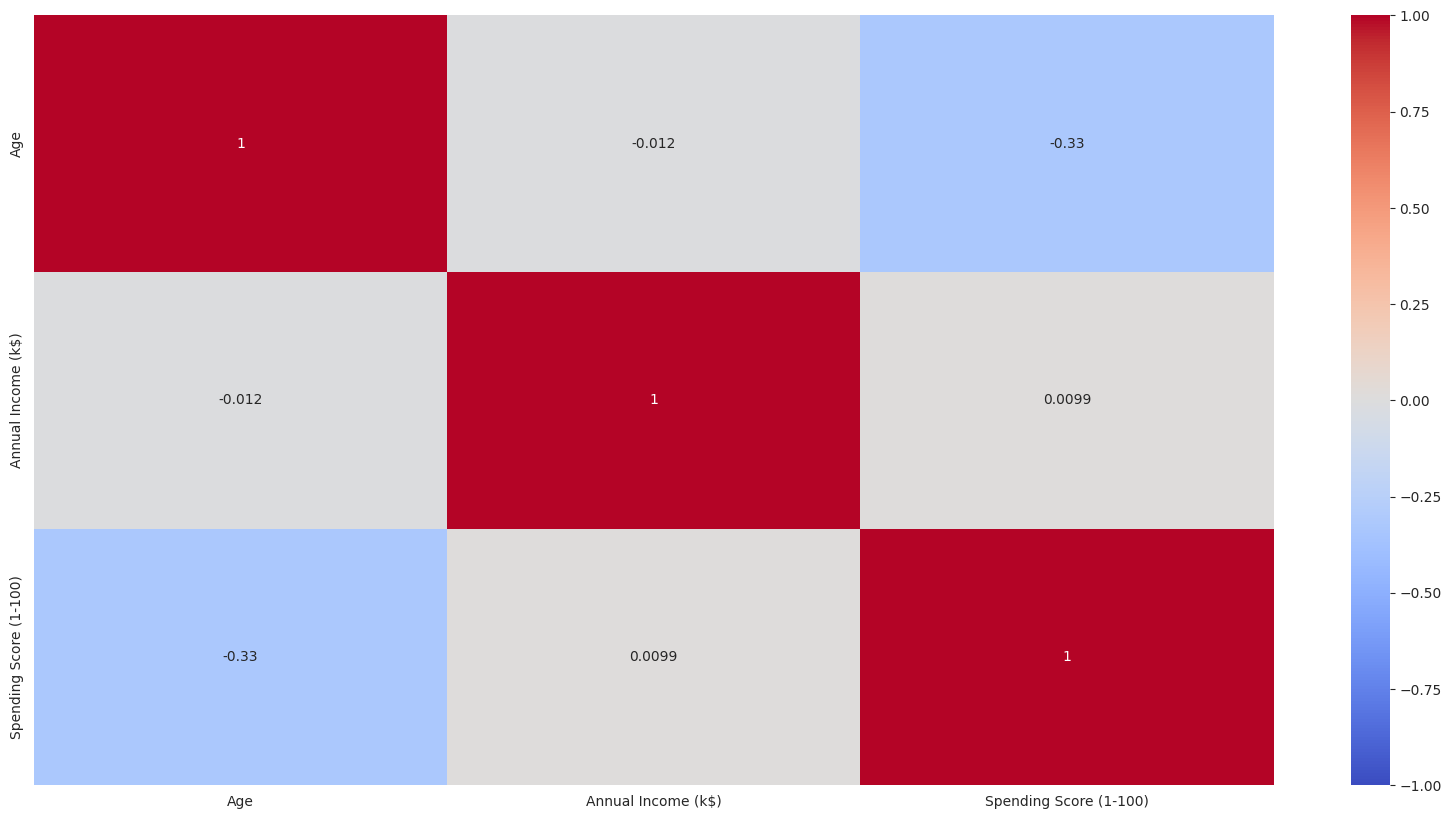

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, cmap="coolwarm")

shows the distribution of 'Spending Score' across different 'Gender' groups





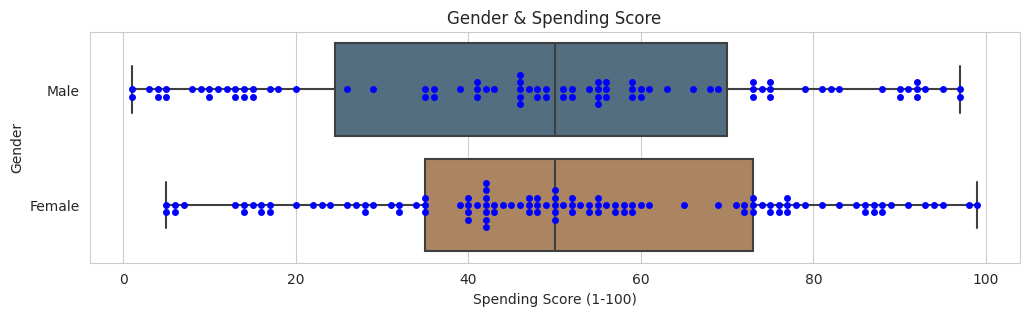

In [20]:
#I used stripplot in order to look at the density of categorical data
plt.figure(figsize=(12, 3))
sns.swarmplot(x='Spending Score (1-100)', y='Gender', data=data, color="b")
sns.boxplot(x='Spending Score (1-100)', y='Gender', data=data, saturation=.3)
plt.title('Gender & Spending Score')
plt.show()




shows the distribution of 'Spending Score' across different 'Gender' groups





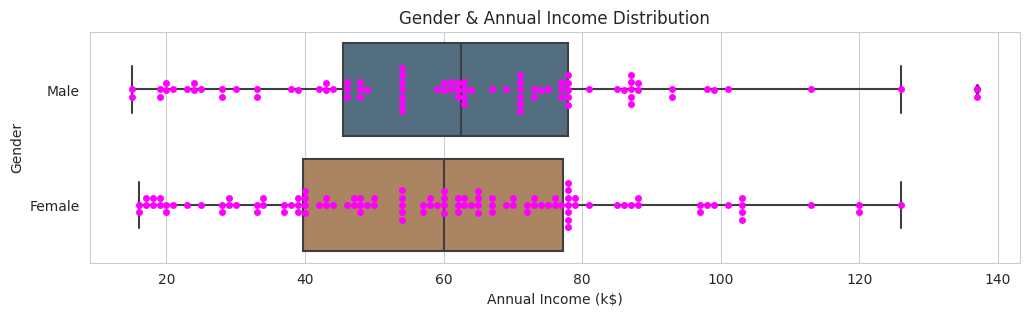

In [21]:
plt.figure(figsize=(12, 3))
sns.swarmplot(x='Annual Income (k$)', y='Gender', data=data, color="magenta")
sns.boxplot(x='Annual Income (k$)', y='Gender', data=data, saturation=0.3)
plt.title('Gender & Annual Income Distribution')
plt.show()

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score



#### *i. Create a new dataset with two variables of your choice*

In [22]:
age_spending_score=data[["Age",	"Spending Score (1-100)"]]

In [23]:
age_spending_score.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [24]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [25]:
hopkins(df, 1)

0.7099843620046524

In [26]:
age_spending_score = df.loc[:,['Age','Spending Score (1-100)']]
age_spending_score

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [27]:
hopkins(age_spending_score, 1)

0.6797194507945241

According to the hopkins test , we can say that our data more prone to data clustering

#### *ii. Determine optimal number of clusters*

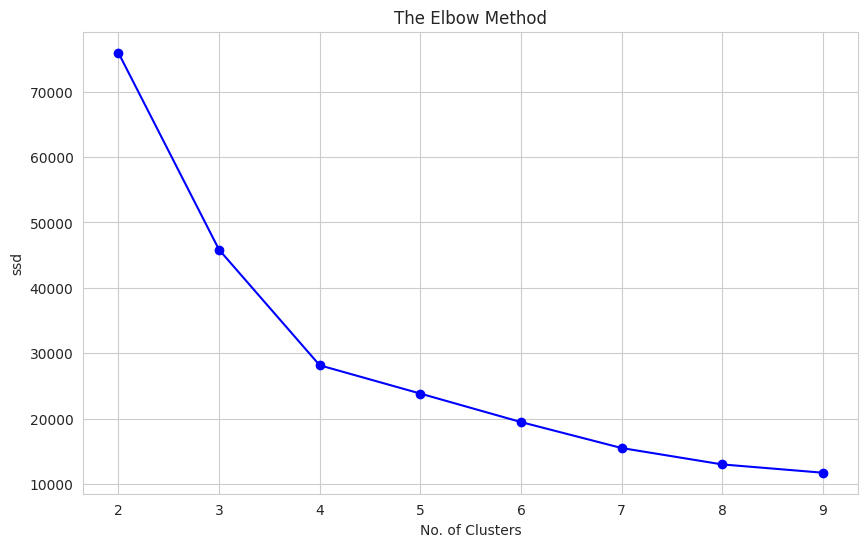

In [28]:
from sklearn.cluster import KMeans
ssd =[]
for k in range(2,10):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(age_spending_score)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 10), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()


- Using elbow method we get 4 cluster as optimal number

In [29]:

ssd
# sum of squared distance


[75949.15601023019,
 45840.67661610866,
 28165.583566629342,
 23838.248821646186,
 19483.1179104427,
 15514.19313435103,
 13006.483628851018,
 11738.02029695451]

In [30]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(age_spending_score)
    distances = kmeanModel.transform(age_spending_score) # calculate distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # calculate distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result))

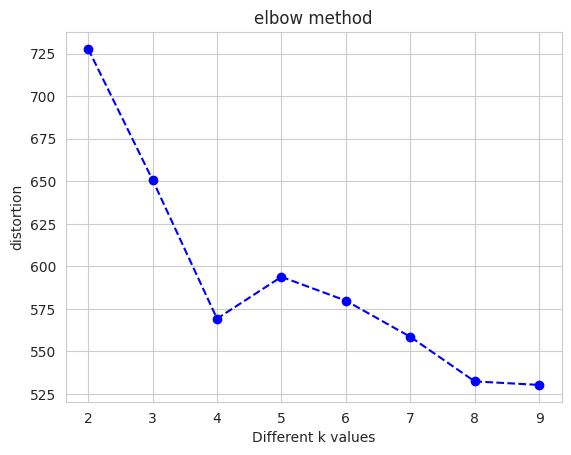

In [31]:
plt.plot(K, distortion, "bo--") #mean s error
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")
plt.show()

The second test showed the same results as the first test . So, the optimal number of  cluster is 4





In [32]:
from sklearn.metrics import silhouette_score
kmeans.labels_

array([5, 2, 1, 2, 7, 2, 1, 4, 6, 2, 6, 4, 6, 2, 1, 2, 7, 2, 8, 4, 7, 2,
       8, 2, 6, 4, 7, 2, 7, 4, 6, 2, 6, 4, 8, 2, 8, 2, 7, 2, 0, 4, 3, 2,
       8, 2, 3, 5, 7, 7, 3, 2, 5, 0, 3, 3, 3, 0, 5, 3, 0, 5, 0, 0, 0, 5,
       3, 0, 5, 5, 0, 3, 0, 0, 0, 5, 3, 3, 5, 3, 0, 3, 0, 3, 5, 3, 0, 5,
       2, 3, 0, 5, 3, 7, 7, 5, 3, 5, 3, 5, 5, 3, 0, 5, 3, 5, 0, 3, 0, 0,
       0, 5, 7, 5, 5, 5, 0, 3, 3, 3, 5, 7, 3, 4, 7, 2, 7, 4, 6, 2, 8, 2,
       7, 2, 1, 4, 8, 2, 1, 2, 6, 4, 7, 4, 1, 4, 3, 2, 8, 4, 8, 4, 8, 2,
       8, 4, 1, 2, 1, 2, 3, 4, 1, 4, 8, 2, 8, 4, 7, 2, 8, 2, 1, 4, 6, 4,
       6, 2, 6, 4, 7, 4, 8, 4, 7, 4, 8, 2, 8, 4, 7, 2, 1, 4, 8, 2, 8, 2,
       1, 4], dtype=int32)

In [44]:
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(age_spending_score)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(age_spending_score, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116


In [41]:
def silhouette_k_clusters(df):

    scores = []
    for n in K:
        kmeans = KMeans(n_clusters = n, random_state = 1010)
        kmeans.fit(df)
        cluster_labels = kmeans.labels_
        silhouette_avg = silhouette_score(df, cluster_labels)
        scores.append(silhouette_avg)
    plt.plot(K, scores, 'bo--')
    plt.xlabel('k values')
    plt.ylabel('silhouette score')




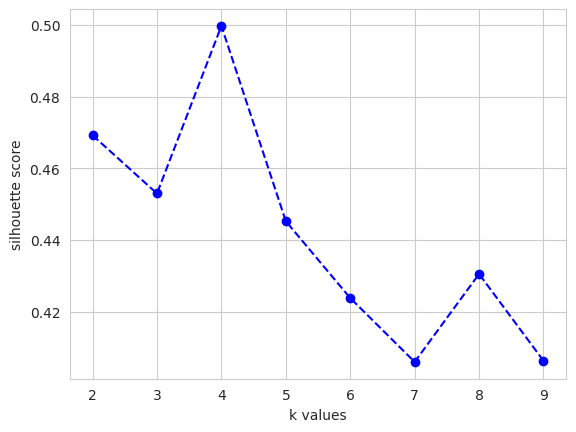

In [42]:
    silhouette_k_clusters(age_spending_score)


The highest score is the best number for clustre.



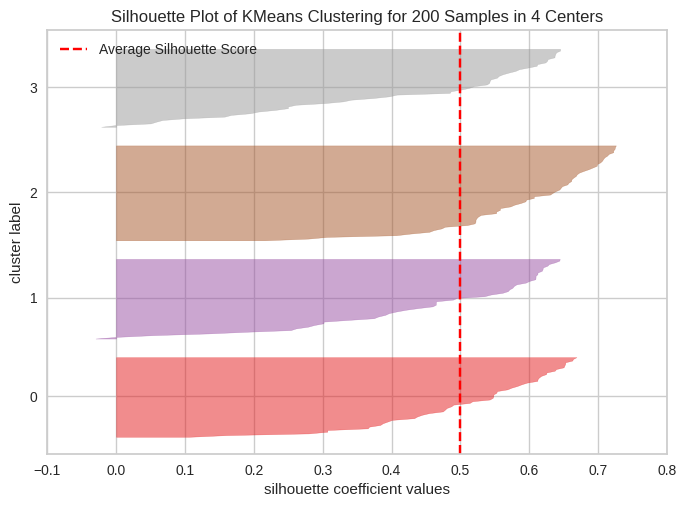

In [46]:
from yellowbrick.cluster import SilhouetteVisualizer

model1= KMeans(n_clusters=4,
                random_state=42)
visualizer = SilhouetteVisualizer(model1)

visualizer.fit(age_spending_score)    # Fit the data to the visualizer
visualizer.poof();

The highest score is the best number for clustre.



### Why silhouette_score is negative?

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

#### *iii. Apply K Means*

In [45]:
kmeans = KMeans(n_clusters=4, random_state=42)


In [46]:
kmeans.fit_predict(age_spending_score)


array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [47]:
age_spending_score["cluster_Kmeans"] = kmeans.fit_predict(age_spending_score)

In [48]:
age_spending_score.sample(40)
#Show some of data with corresponding cluster

,Age,Spending Score (1-100),cluster_Kmeans
19,35,98,2
144,25,12,1
193,38,91,2
186,54,24,1
24,54,14,1
109,66,48,0
106,66,50,0
120,27,56,3
102,67,59,0
29,23,87,2


#### *iv. Visualizing and Labeling All the Clusters*

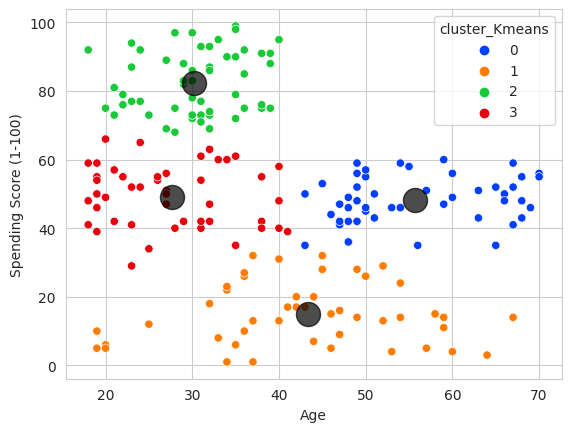

In [49]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='cluster_Kmeans', data=age_spending_score, palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.7)
plt.show()

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [50]:
annual_spending_score=data[["Annual Income (k$)",	"Spending Score (1-100)"]]

In [51]:
annual_spending_score.sample(20)


,Annual Income (k$),Spending Score (1-100)
110,63,52
176,88,15
193,113,91
31,30,73
51,42,60
123,69,91
67,48,48
71,49,42
171,87,75
74,54,47


#### *ii. Determine optimal number of clusters*

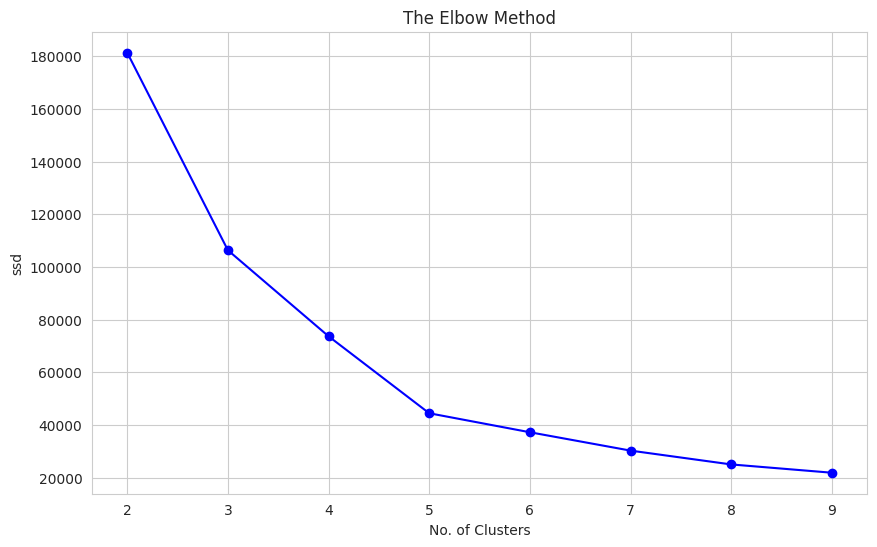

In [52]:
ssd =[]
for k in range(2,10):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(annual_spending_score)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 10), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()

In [53]:
ssd


[181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30259.65720728547,
 25011.839349156588,
 21862.092672182895]

In [54]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(annual_spending_score)
    distances = kmeanModel.transform(annual_spending_score)
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i]
        result.append(np.mean(cluster_distances ** 2))
    distortion.append(sum(result))

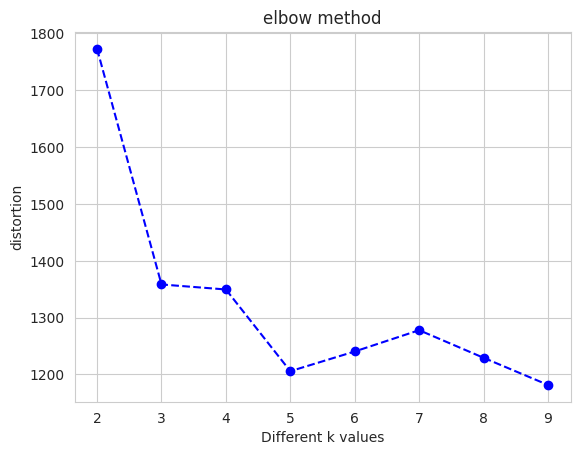

In [55]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")
plt.show()

The second test showed the same results as the first test . So, the optimal number of  cluster is 5





In [56]:
silhouette_score(annual_spending_score, kmeans.labels_)


0.4553729779390266

In [57]:
def silhouette_k_clusters(df):

    scores = []
    for n in K:
        kmeans = KMeans(n_clusters = n, random_state = 1010)
        kmeans.fit(df)
        cluster_labels = kmeans.labels_
        silhouette_avg = silhouette_score(df, cluster_labels)
        scores.append(silhouette_avg)
    plt.plot(K, scores, 'bo--')
    plt.xlabel('k values')
    plt.ylabel('silhouette score')

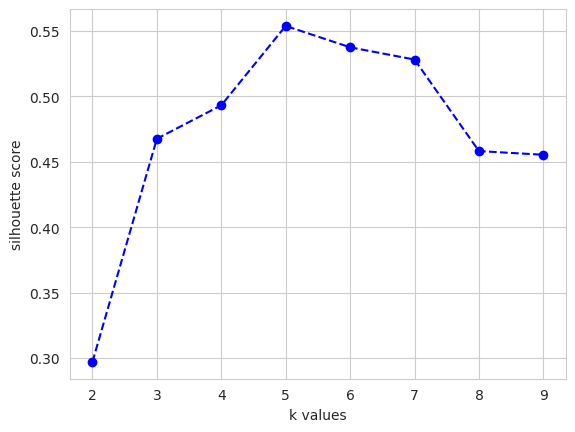

In [58]:
silhouette_k_clusters(annual_spending_score)

The highest score is the best number for clustre.



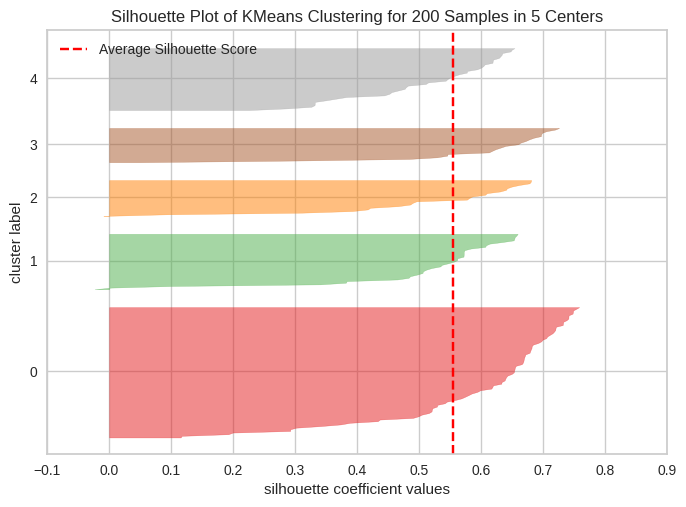

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [60]:
from yellowbrick.cluster import SilhouetteVisualizer
model2= KMeans(n_clusters=5,
                random_state=42)
visualizer = SilhouetteVisualizer(model2)

visualizer.fit(annual_spending_score)    # Fit the data to the visualizer
visualizer.poof()

#### *iii. Apply K Means*

In [61]:
kmeans = KMeans(n_clusters=5, random_state=42)


In [62]:
kmeans.fit_predict(annual_spending_score)


array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [63]:
annual_spending_score["cluster_Kmeans"] = kmeans.fit_predict(annual_spending_score)


In [64]:
annual_spending_score.sample(40)

,Annual Income (k$),Spending Score (1-100),cluster_Kmeans
129,71,75,4
73,50,56,0
51,42,60,0
119,67,57,0
59,46,46,0
36,34,17,2
106,63,50,0
195,120,79,4
57,44,46,0
56,44,50,0


#### *iv. Visualizing and Labeling All the Clusters*

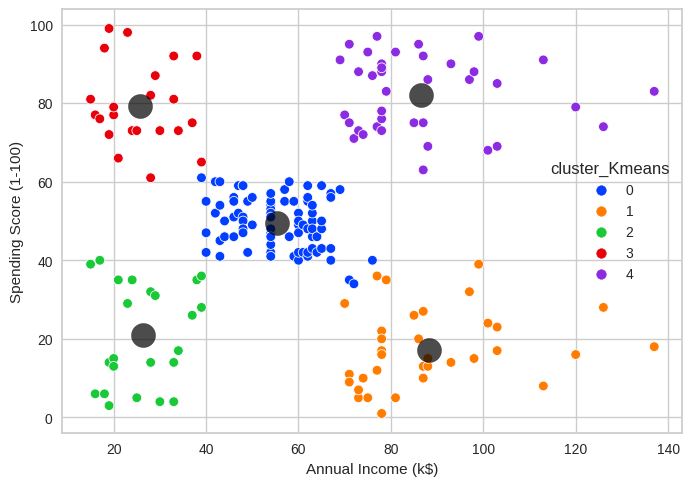

In [65]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster_Kmeans', data=annual_spending_score, palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.7)
plt.show()

### Hierarchical Clustering



### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [66]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [67]:
hc_ward = linkage(y = age_spending_score, method = "ward")    #
hc_complete = linkage(age_spending_score, "complete")         #
hc_average = linkage(age_spending_score, "average")           #
hc_single = linkage(age_spending_score, "single")

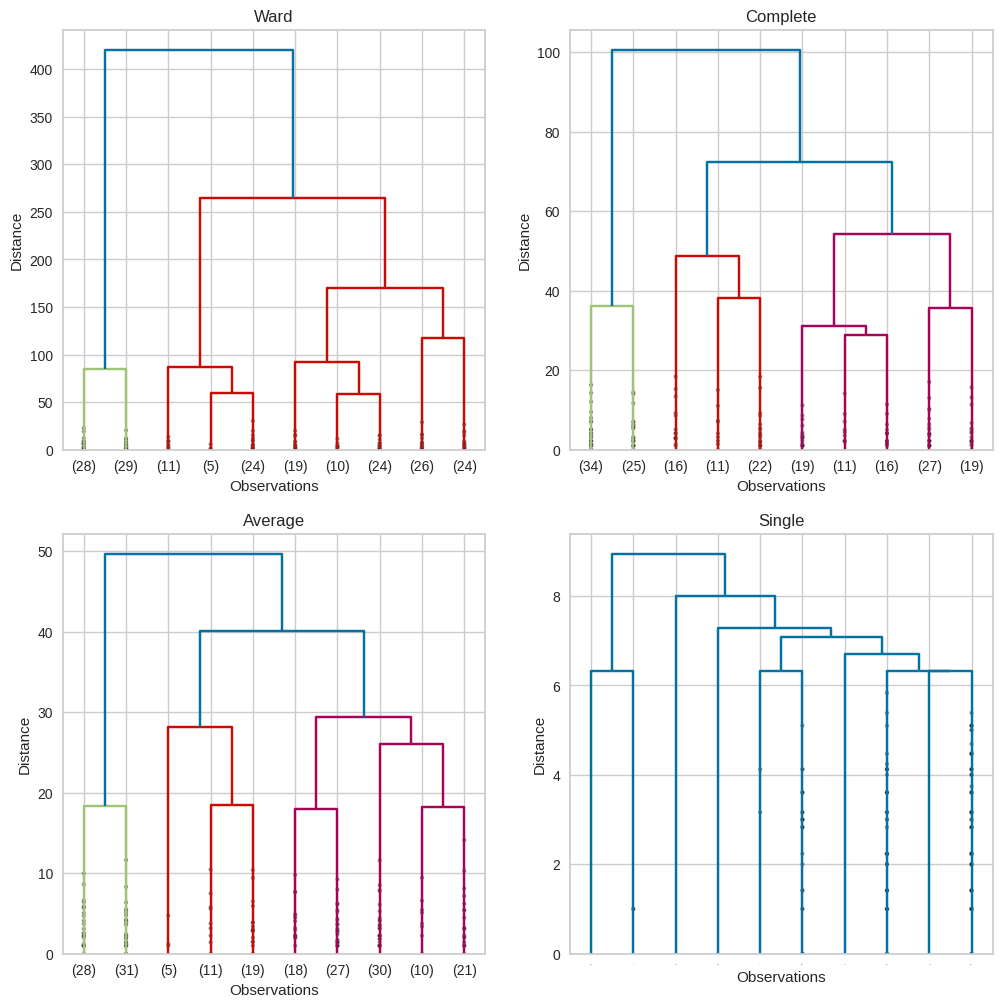

In [68]:
plt.figure(figsize = (12,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size=1)
plt.show()

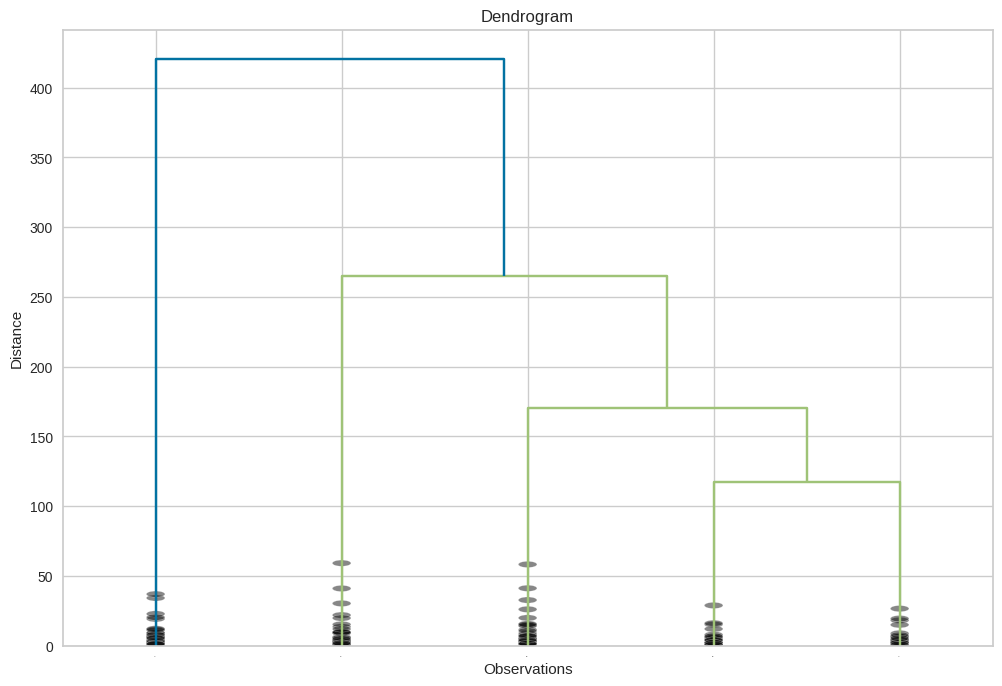

In [69]:
plt.figure(figsize = (12,8))

plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p =5, show_contracted = True, leaf_font_size=1)
plt.show()

In [70]:
from sklearn.cluster import AgglomerativeClustering
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    #  kmeans
    Agg_model1 = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model1.fit(age_spending_score)
    cluster_labels = Agg_model1.labels_
    # silhouette score
    silhouette_avg = silhouette_score(age_spending_score, cluster_labels)

    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.45437524400798707
For n_clusters=3, the silhouette score is 0.4403939907045589
For n_clusters=4, the silhouette score is 0.4605877438219549
For n_clusters=5, the silhouette score is 0.4039101313348303
For n_clusters=6, the silhouette score is 0.4122277010437696
For n_clusters=7, the silhouette score is 0.4154024433868577
For n_clusters=8, the silhouette score is 0.387772181711837
For n_clusters=9, the silhouette score is 0.39419016298118076


In [71]:
def agg_silhouette_score(df):

    scores = []
    for k in K:
        model = AgglomerativeClustering(n_clusters = k)
        model.fit(df)
        cluster_labels = model.labels_
        silhouette_avg = silhouette_score(df, cluster_labels)
        scores.append(silhouette_avg)
    plt.plot(K, scores, 'bo--')
    plt.xlabel('k values')
    plt.ylabel('silhouette score')
    plt.title('Silhouette Scores for Agglomerative Clustering');

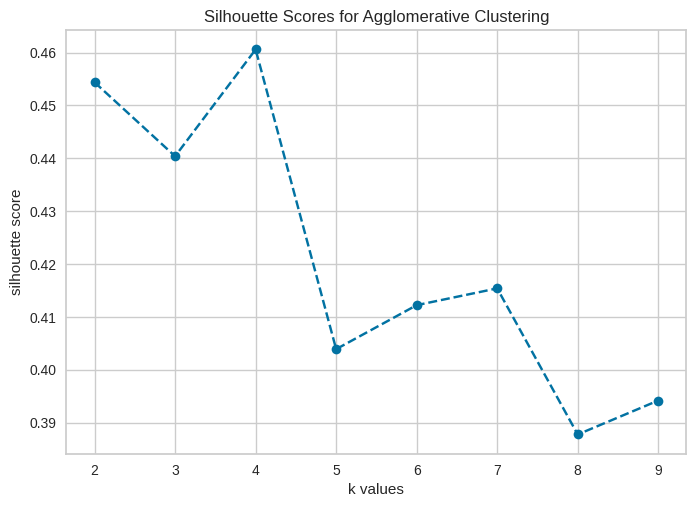

In [72]:
agg_silhouette_score(age_spending_score)

## Clustering based on Annual Income and Spending Score- x2

In [73]:
hc_ward = linkage(y = annual_spending_score, method = "ward")
hc_complete = linkage(annual_spending_score, "complete")
hc_average = linkage(annual_spending_score, "average")
hc_single = linkage(annual_spending_score, "single")

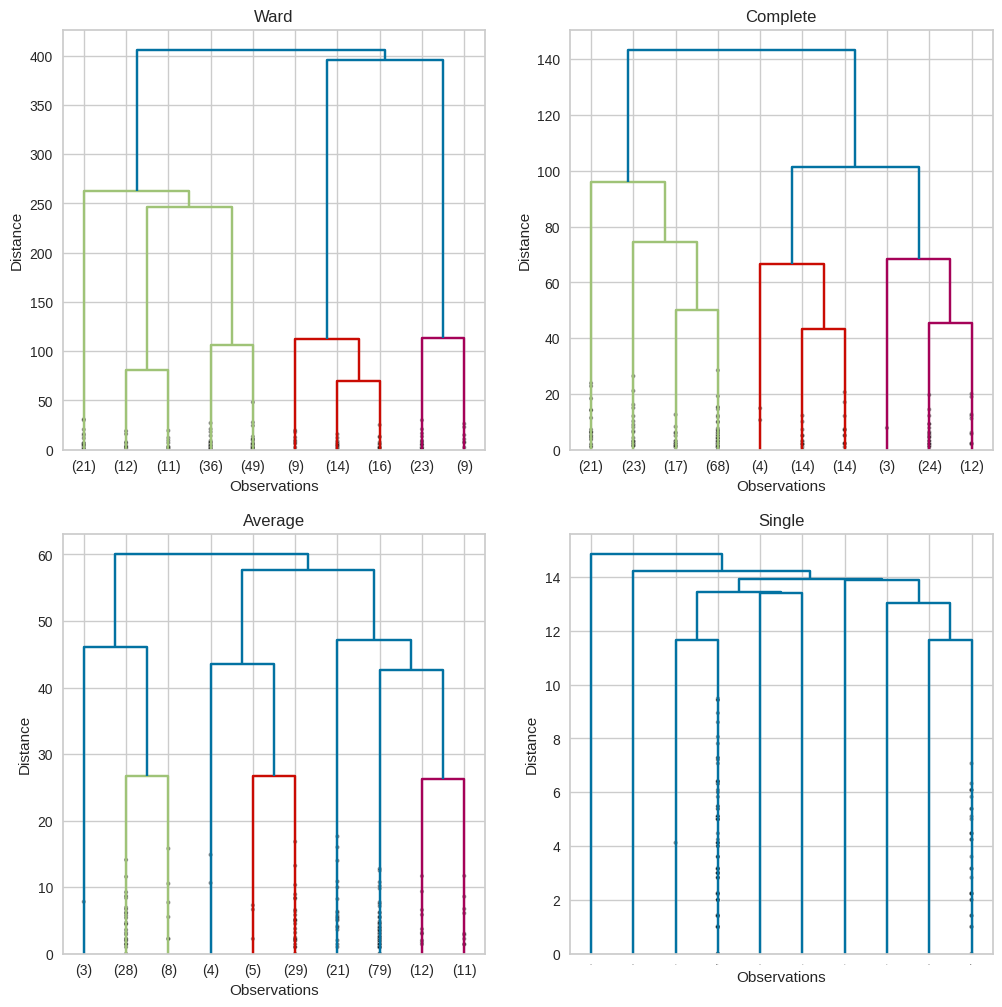

In [74]:
plt.figure(figsize = (12,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size=1)
plt.show()

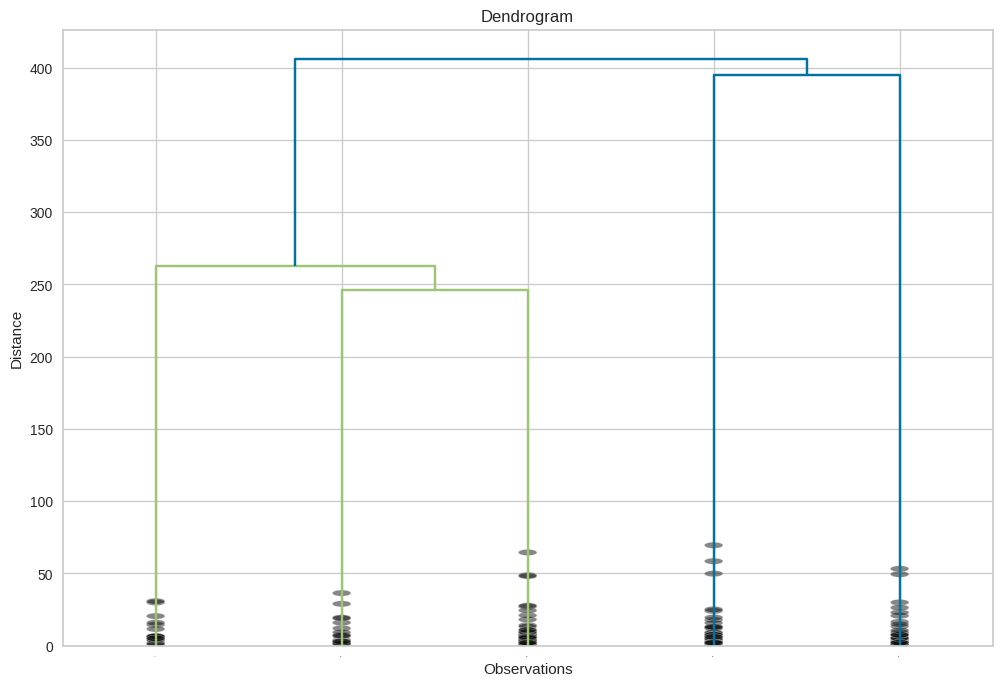

In [75]:
plt.figure(figsize = (12,8))

plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p =5, show_contracted = True, leaf_font_size=1)
plt.show()

In [76]:
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    #  kmeans
    Agg_model1 = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model1.fit(annual_spending_score)
    cluster_labels = Agg_model1.labels_
    # silhouette score
    silhouette_avg = silhouette_score(annual_spending_score, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.36737734620684265
For n_clusters=3, the silhouette score is 0.462308734038414
For n_clusters=4, the silhouette score is 0.4924899099064366
For n_clusters=5, the silhouette score is 0.5541332798644271
For n_clusters=6, the silhouette score is 0.5390996397382017
For n_clusters=7, the silhouette score is 0.520894822141792
For n_clusters=8, the silhouette score is 0.43313054817610713
For n_clusters=9, the silhouette score is 0.43944465774630276


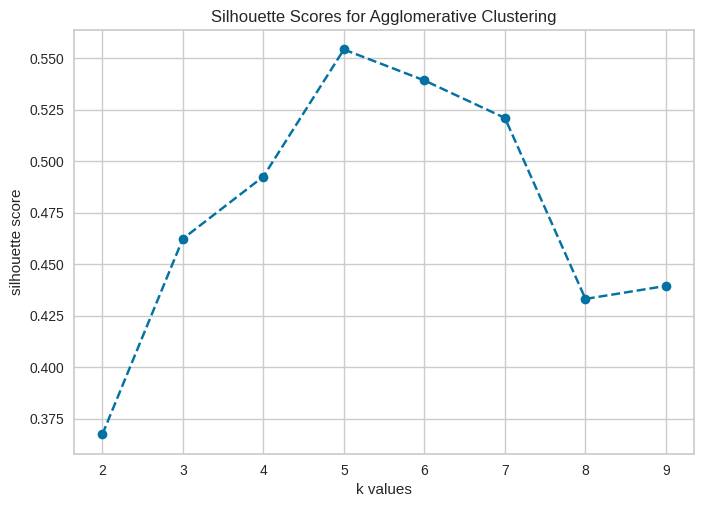

In [77]:
agg_silhouette_score(annual_spending_score)

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [78]:
age_spending_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y= age_spending_model.fit_predict(age_spending_score)

In [79]:
age_spending_score['Agglomerative_cluster'] = y
age_spending_score.sample(40)

,Age,Spending Score (1-100),cluster_Kmeans,Agglomerative_cluster
153,38,76,2,3
22,46,5,1,2
154,47,16,1,2
131,39,75,2,3
70,70,55,0,1
98,48,42,0,1
59,53,46,0,1
4,31,40,3,0
55,47,41,0,1
148,34,22,1,2


#### Annual Income and Spending Score- x2

In [80]:
Annual_spend_Agglomerative = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y2 = Annual_spend_Agglomerative.fit_predict(annual_spending_score)
annual_spending_score['cluster_Agg'] = y2
annual_spending_score.sample(50)

,Annual Income (k$),Spending Score (1-100),cluster_Kmeans,cluster_Agg
190,103,23,1,0
145,77,97,4,2
120,67,56,0,1
3,16,77,3,3
90,59,55,0,1
182,98,15,1,0
102,62,59,0,1
79,54,42,0,1
84,54,57,0,1
37,34,73,3,3


### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

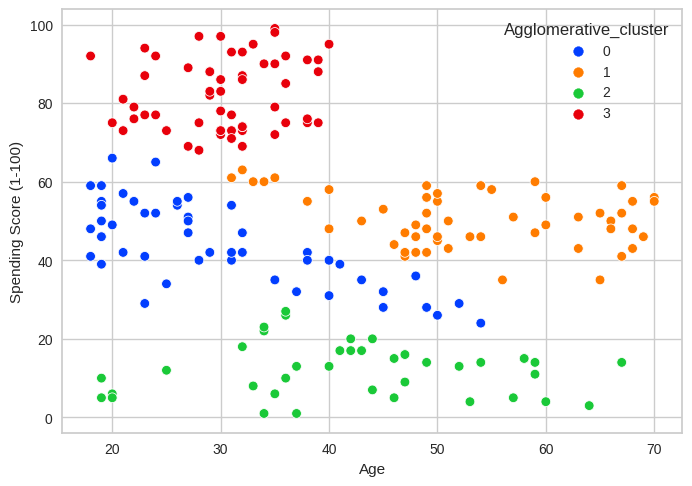

In [81]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Agglomerative_cluster', data=age_spending_score, palette="bright")

plt.show()

#### Annual Income and Spending Score- x2

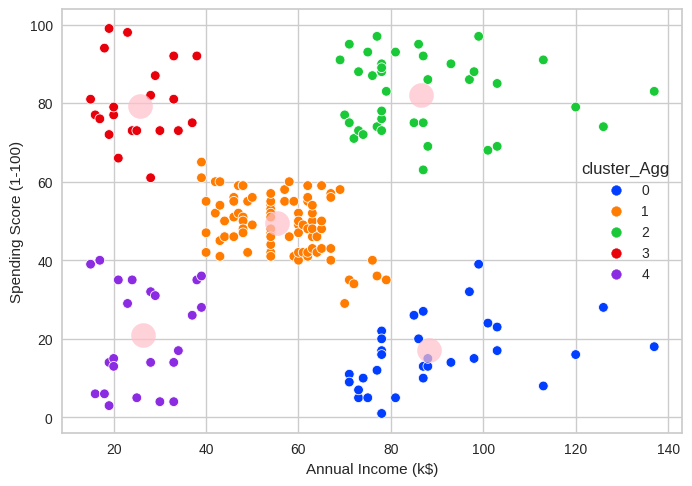

In [82]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster_Agg', data=annual_spending_score, palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='pink', s=300, alpha=0.7)
plt.show()



#### Interpretation based on Age and Spending Score- x1

In [88]:
# calculate silhouette_score for both models
labels = kmeans.labels_
silhouette_score(age_spending_score, labels).round(4)


0.1632

In [86]:
labels2 = age_spending_model.labels_
silhouette_score(age_spending_score, labels2).round(4)

0.4618

In [90]:
clusters_averge_age = age_spending_score.groupby(['Agglomerative_cluster']).mean()['Age'].sort_values()
clusters_averge_age

Agglomerative_cluster
3    30.175439
0    30.520000
2    42.650000
1    53.169811
Name: Age, dtype: float64

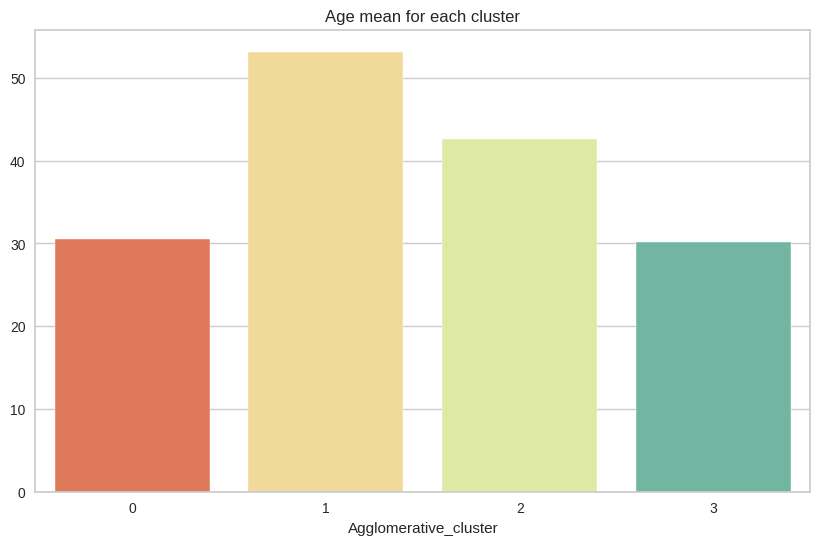

In [100]:
plt.figure(figsize=(10, 6))
sns.barplot(x = clusters_averge_age.index, y = clusters_averge_age.values,  palette='Spectral')
plt.title('Age mean for each cluster')
plt.show()

In [105]:
df_label = pd.concat([df, age_spending_score['Agglomerative_cluster']], axis=1)


In [106]:
#Find the average of Annual Income for each cluster
Income_mean = df_label.groupby(['Agglomerative_cluster']).mean()['Annual Income (k$)'].sort_values()
Income_mean

Agglomerative_cluster
1    54.207547
0    55.760000
3    66.070175
2    67.125000
Name: Annual Income (k$), dtype: float64

In [108]:
#Find the average of Spending Score for each cluster
Score_mean = df_label.groupby(['Agglomerative_cluster']).mean()['Spending Score (1-100)'].sort_values()
Score_mean

Agglomerative_cluster
2    12.275000
0    43.620000
1    50.452830
3    82.350877
Name: Spending Score (1-100), dtype: float64

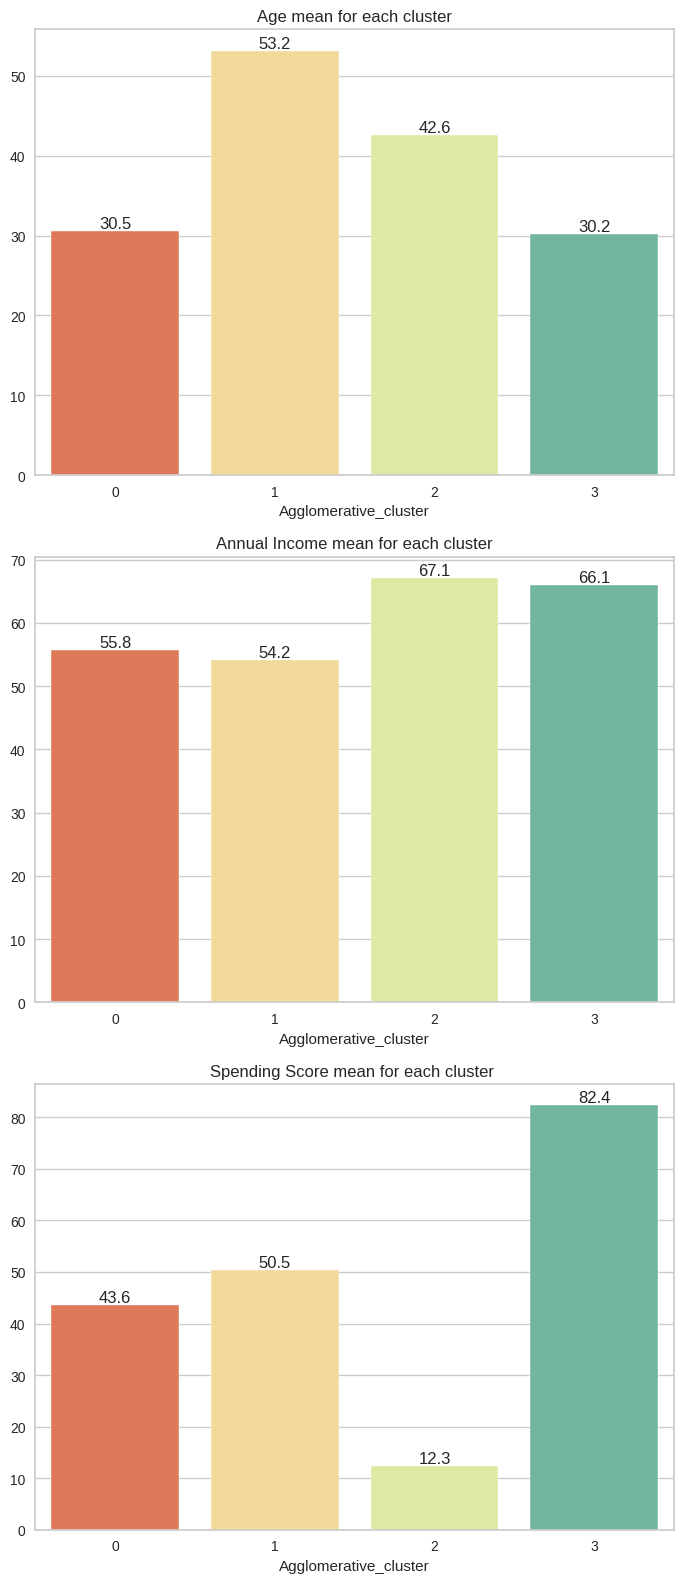

In [113]:
plt.figure(figsize=(7, 16))

plt.subplot(311)
ax = sns.barplot(x = clusters_averge_age.index, y = clusters_averge_age.values
                ,palette='Spectral')
ax.bar_label(ax.containers[0], fmt="%.1f")
plt.title('Age mean for each cluster' )

plt.subplot(312)
ax = sns.barplot(x=Income_mean.index, y=Income_mean.values,
                 palette='Spectral')
ax.bar_label(ax.containers[0], fmt="%.1f")
plt.title('Annual Income mean for each cluster')

plt.subplot(313)
ax = sns.barplot(x=Score_mean.index, y=Score_mean.values,
                palette='Spectral')
ax.bar_label(ax.containers[0], fmt="%.1f")
plt.title('Spending Score mean for each cluster ')

plt.tight_layout()
plt.show();

### Conclusion

**cluster 0** : The average age is around 30, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 55,both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending

**cluster 2** :The average age is around 43,the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.


    
**cluster 3**: The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.   

# Interpretation based on Annual Income and Spending Score- x2

In [119]:
# calculate silhouette_score for both models
labels = kmeans.labels_
silhouette_score(annual_spending_score, labels).round(3)


0.556

In [120]:
labels2 = Annual_spend_Agglomerative.labels_
silhouette_score(annual_spending_score, labels2).round(3)

0.555

It is look like both of them has the same scores, So there isn't much difference which one we use

In [129]:
df_labe2 = pd.concat([df, annual_spending_score['cluster_Agg']], axis=1)
df_labe2.head(5)

,Age,Annual Income (k$),Spending Score (1-100),cluster_Agg
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4


In [131]:
#Find the average of Annual Income for each cluster
clusters_averge_income = df_labe2.groupby(['cluster_Agg']).mean()['Annual Income (k$)'].sort_values()
clusters_averge_income


cluster_Agg
3    25.095238
4    26.304348
1    55.811765
2    86.538462
0    89.406250
Name: Annual Income (k$), dtype: float64

In [133]:
#Find the average of Age for each cluster
age_mean = df_labe2.groupby(['cluster_Agg']).mean()['Age'].sort_values()
age_mean

cluster_Agg
3    25.333333
2    32.692308
0    41.000000
1    42.482353
4    45.217391
Name: Age, dtype: float64

In [135]:
#Find the average of Spending Score for each cluster
Score_mean2 = df_labe2.groupby(['cluster_Agg']).mean()['Spending Score (1-100)'].sort_values()
Score_mean2

cluster_Agg
0    15.593750
4    20.913043
1    49.129412
3    80.047619
2    82.128205
Name: Spending Score (1-100), dtype: float64

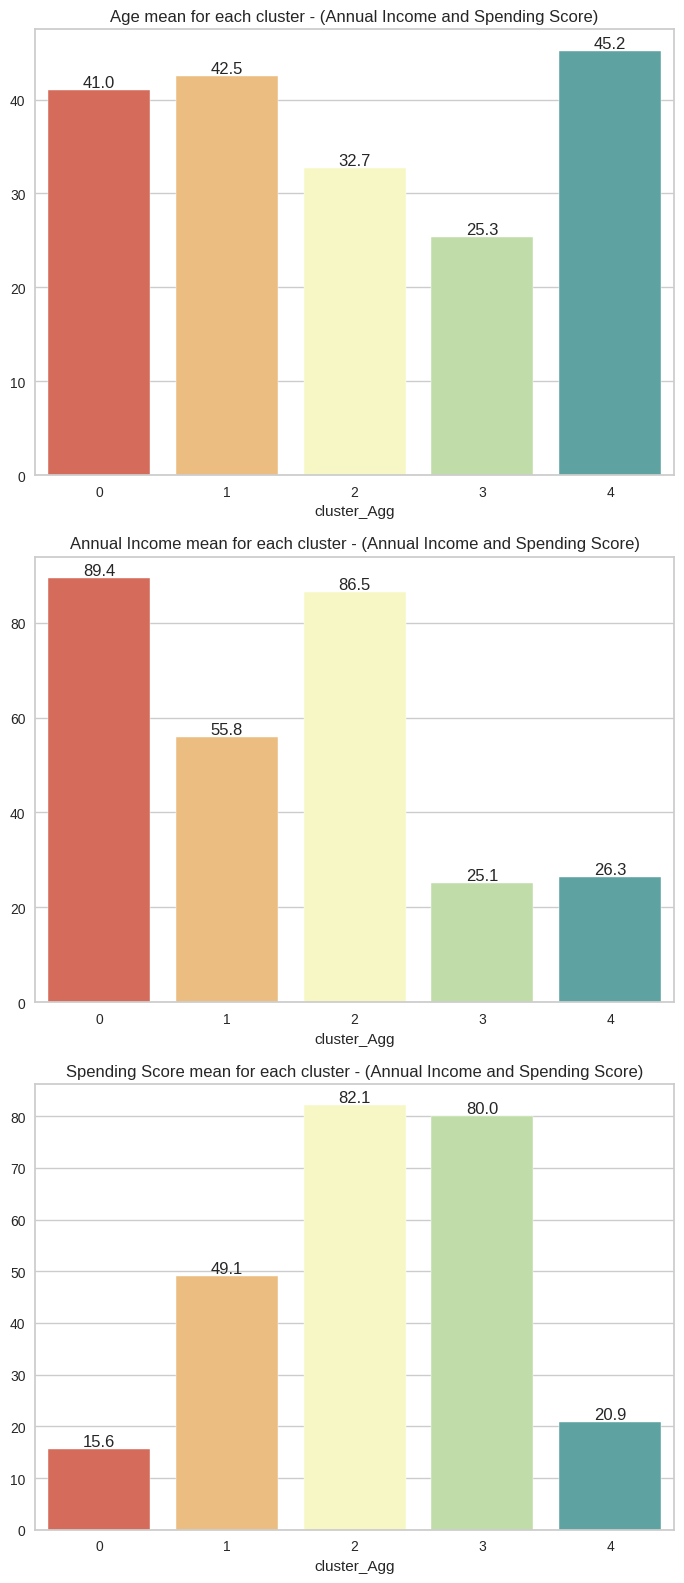

In [139]:
plt.figure(figsize=(7, 16))

plt.subplot(311)
ax = sns.barplot(x = age_mean.index, y = age_mean.values,palette='Spectral')
ax.bar_label(ax.containers[0], fmt="%.1f")
plt.title('Age mean for each cluster - (Annual Income and Spending Score)')

plt.subplot(312)
ax = sns.barplot(x=clusters_averge_income.index, y=clusters_averge_income.values, palette='Spectral')
ax.bar_label(ax.containers[0], fmt="%.1f")
plt.title('Annual Income mean for each cluster - (Annual Income and Spending Score)')

plt.subplot(313)
ax = sns.barplot(x=Score_mean2.index, y=Score_mean2.values, palette='Spectral')
ax.bar_label(ax.containers[0], fmt="%.1f")
plt.title('Spending Score mean for each cluster - (Annual Income and Spending Score)')


plt.tight_layout()
plt.show();

## Conclusion


**cluster 0** : The average age is around 40, the annula_income is very high but the spending_scores is low. This group is our target audience and special strategies need to be developed for this group.

**cluster 1**: The average age is around 42, both annula_income and spending_scores are on average. It should be researched what can be done to direct to more spending

**cluster 2** :The average age is around 32.both annula_income and spending_scores are on average. It should be researched what can be done to direct to more spending

The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 46, The Annual_income and Spending_scores are both very low.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___